In [2]:
from graph_utils import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, anderson

# Характеристики графа Габриэля (vector length 6)

In [3]:
gg_ru = np.load("/Users/yuvlo/Spot-the-bot/Graph/GraphCheck/6_gg_ru.npy", allow_pickle=True).take(0)

gg_ru_6 = nx.Graph()
my_gg_ru_6 = GG(gg_ru)

edges = my_gg_ru_6.get_weighted_edges()
gg_ru_6.add_weighted_edges_from(edges)

100%|██████████████████████████████| 1867261/1867261 [00:20<00:00, 93063.35it/s]


In [16]:
df = pd.read_csv("/Users/yuvlo/Spot-the-bot/Russian/RuPreprocessedNoSep.csv")
df_bot = pd.read_csv("/Users/yuvlo/Spot-the-bot/Russian/BotRuPreprocessedNoSep.csv")

In [19]:
df['text_len'] = df['preprocessed_text_no_sep'].apply(lambda text: len(text.split()))
df_bot['text_len'] = df_bot['bot_preprocessed_text_no_sep'].apply(lambda text: len(text.split()))

In [36]:
df.sort_values(by="text_len", inplace=True)
df_bot.sort_values(by="text_len", inplace=True)

In [44]:
indexes = list(df[np.logical_and(5000 <= df['text_len'], df['text_len'] <= 5350)].index)

In [51]:
def create_length_indexes(df, df_bot, interval: tuple) -> indexes:
    df['text_len'] = df['preprocessed_text_no_sep'].apply(lambda text: len(text.split()))
    df_bot['text_len'] = df_bot['bot_preprocessed_text_no_sep'].apply(lambda text: len(text.split()))
    df.sort_values(by="text_len", inplace=True)
    df_bot.sort_values(by="text_len", inplace=True)
    indexes = list(df[np.logical_and(interval[0] <= df['text_len'], df['text_len'] <= interval[1])].index)
    return indexes

In [52]:
indexes = create_length_indexes(df, df_bot, (5000, 5350))

In [66]:
curr_indexes = []
count = 1
for index in indexes:
    curr_indexes.append(index)
    if len(curr_indexes) == 11:
        np.save(f"{count}_texts_indexes_5000", np.array(curr_indexes))
        count += 1
        curr_indexes = []

In [65]:
ind = np.load("/Users/yuvlo/Spot-the-bot/Graph/11_texts_indexes_5000.npy")

In [63]:
ind

array([5786, 7932, 2723, 4266, 2500, 4666, 5715, 7540, 3914, 9605, 6394,
        280, 4316, 8344,  370, 5744, 7010, 1894, 6210])

In [58]:
len(indexes)

209

In [56]:
df.loc[indexes]

,preprocessed_text_no_sep,text_len
5786,истребитель тварь истребитель тварь григорий и...,5000
7932,владимир галактионович начало девяностый год п...,5000
2723,хроника хроника весь право защищать никакой ча...,5002
4266,острие ужас острие ужас григорий острие ужас п...,5004
2500,василий добрый генерал представлять также боль...,5007
...,...,...
9827,каникулы каникулы агата кристи каникулы глава ...,5338
6590,год год александр сергеевич пушкин год городок...,5341
5000,кадетский монастырь глава первый переводиться ...,5344
198,зинаида гиппиус неуместный рифма напевный пот ...,5344


In [55]:
df_bot.loc[indexes]

,bot_preprocessed_text_no_sep,text_len
5786,приходить подобный большой подруга весь весь с...,4508
7932,пристально становиться подобный девушка молодо...,4689
2723,возможно возможность признаваться заставлять п...,4754
4266,приходить весь должный просто подниматься проп...,4604
2500,конец просто получать подвигаться принимать пр...,4363
...,...,...
9827,подавать подумать возможно подобный подобный п...,5190
6590,подходить весь настоящий весь отец просто мочь...,4825
5000,свой сторона подписывать помогать дело просто ...,4755
198,становиться стол становиться проводить просто ...,4978


In [21]:
df_bot

,bot_preprocessed_text_no_sep,text_len
0,рассказывать попросить собираться приходиться ...,10023
1,становиться позволять приходить весь столько п...,884
2,представлять просто весь слово помогать подобн...,3704
3,старик становиться удовольствие просто обезору...,11227
4,поставлять заставлять просто просто стоять ста...,11301
...,...,...
10398,получать оставаться просто последний родственн...,14517
10399,принимать голова случай просто становиться пос...,12954
10400,старый приходиться слово поступать случай неск...,18177
10401,разговор становиться положение подходить подым...,5278


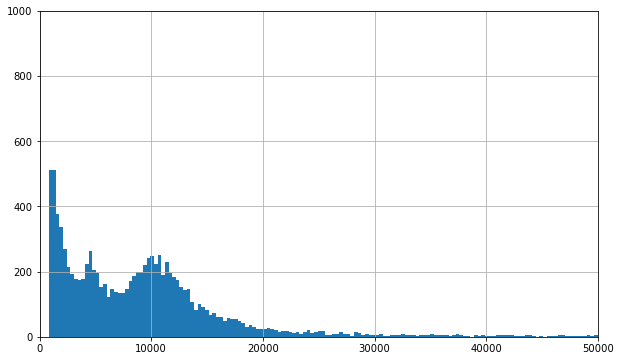

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_len'], bins=1000)
plt.ylim(0, 1000)
plt.xlim(0, 50000)
plt.grid()
plt.show()

## Распределение степеней

In [3]:
def plot_graph_degrees(degrees: list, k: int, x_max: int, y_max: int = 20000, size: tuple = (10, 8)):
    degrees = np.array(degrees)
    y = []
    xs = [x for x in range(x_max)]
    for x in xs:
        y.append(len(degrees[degrees == x]))
    plt.figure(figsize=size)
    plt.bar(x=xs, height=y)
    plt.xticks(xs, rotation=45)
    plt.grid()
    plt.title(f"Распределение степеней графа Габриэля при размере вектора {k}")
    plt.ylabel("Кол-во вершин")
    plt.xlabel("Кол-во соседей")
    plt.ylim(0, y_max)
    plt.show()
    return y

In [4]:
graph_degrees = my_gg_ru_6.get_graph_degrees()

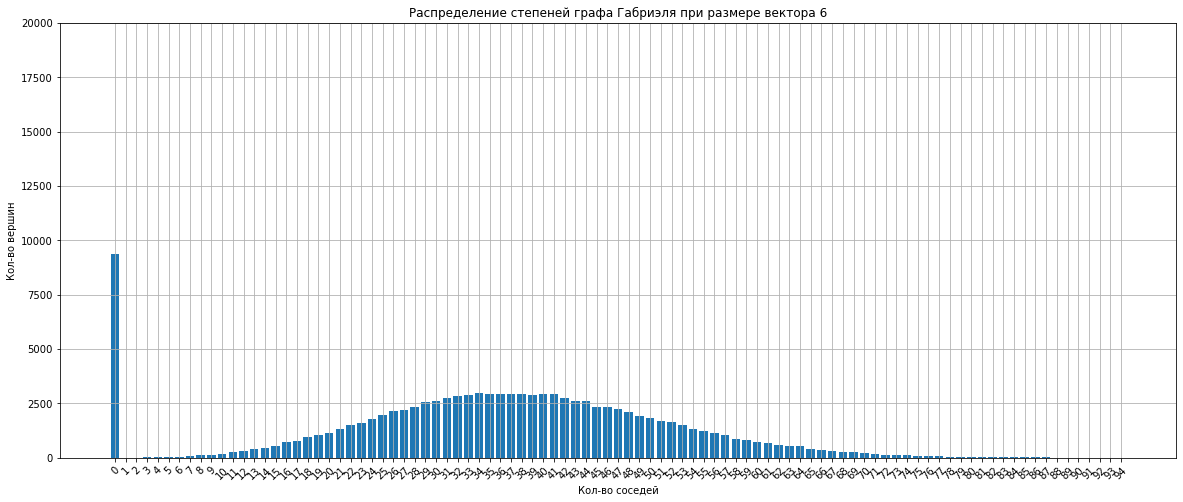

In [5]:
y = plot_graph_degrees(graph_degrees, k=6, x_max=95, size=(20, 8))

In [14]:
y[0]

9346

In [15]:
sum(y[1:])

97028

In [11]:
stat, p = normaltest(y[1:])

In [12]:
p

4.633259340517751e-07

In [13]:
print(p * 1000)

0.00046332593405177505


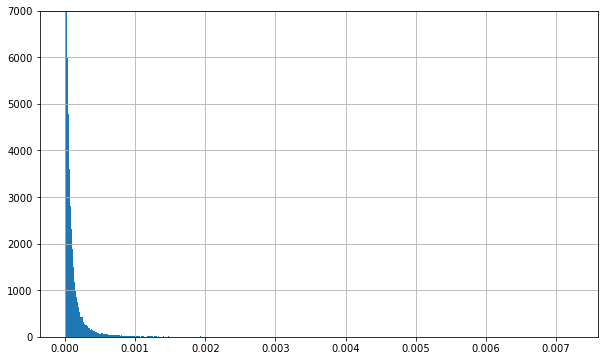

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(gg_lc.values(), bins=1000)
plt.ylim(0, 7000)
plt.grid()
plt.show()

## Диаметр графа

In [11]:
diameter_and_radius = np.load("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_diameter_and_radius.npy")

In [13]:
diameter_and_radius[0]

25.400803058900458

## Радиус графа

In [14]:
diameter_and_radius[1]

13.145435641054364

## Средняя длина кратчайшего пути (average shortest path length)

In [16]:
np.load("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_av_shortest_path_len.npy")

array([0.08443474])

In [31]:
len(gg_ru_6)

97031

In [32]:
average_shortest_path_length(gg_ru_6, weight='weight')

KeyboardInterrupt: 

## Распределение центральности по близости (closeness centrality)

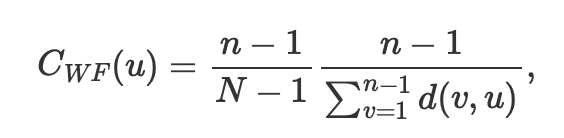

In [18]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_closeness_centrality.pickle", 'rb') as f:
    gg_cc = pickle.load(f)

In [20]:
gg_cc

{'поножовщина': 19.45100733881495,
 'душитель': 19.514818742764934,
 'централизованно': 20.552144133340978,
 'перепрофилировать': 20.761518488359936,
 'нефтянка': 21.052936796040928,
 'атиля': 21.02645082742342,
 'шпанка': 20.335481074438352,
 'хлебопекарня': 20.38350883008192,
 'восьмирублевый': 21.004962298752115,
 'венедиктович': 21.015894585888894,
 'обо': 1.9755268518838809,
 'приглашать': 1.7194390354614817,
 'молотьба': 17.19496607253694,
 'станичный': 16.908847414603013,
 'почесывание': 20.899687932060004,
 'брусочек': 20.966628857042753,
 'восстановитель': 21.016866789075422,
 'разграблять': 20.83674001112635,
 'найт': 21.001385774899916,
 'гипнос': 21.002076690004767,
 'лежать': 0.6318472629098637,
 'белый': 0.5428033824847468,
 'плесневый': 20.956598658630497,
 'милослава': 20.953640271680744,
 'вымогательство': 19.717120987058674,
 'совершеннолетний': 19.483114733956686,
 'беспрерывный': 10.64104733714113,
 'набожный': 12.179142856358752,
 'легковушка': 13.511323372912143,


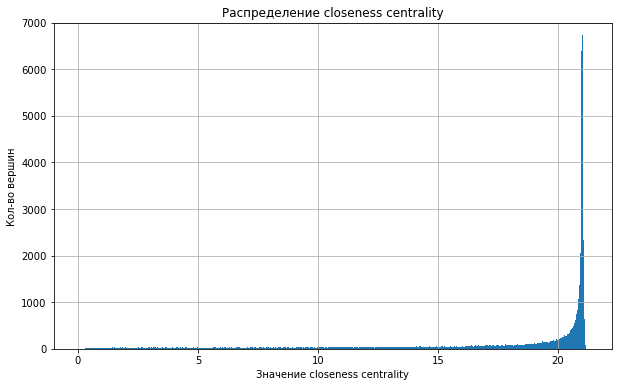

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(gg_cc.values(), bins=1000)
plt.ylim(0, 7000)
plt.grid()
plt.title("Распределение closeness centrality")
plt.xlabel("Значение closeness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Средняя степень соседей (Average Neighbor Degree)

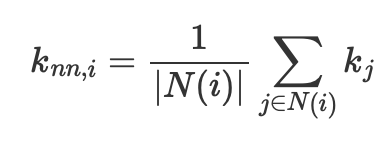

In [51]:
av_nd = nx.average_neighbor_degree(gg_ru_6)

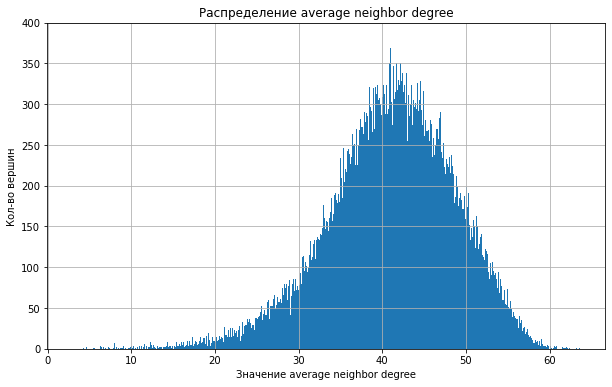

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd.values(), bins=1000)
plt.ylim(0, 400)
plt.title("Распределение average neighbor degree")
plt.xlabel("Значение average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.grid()
plt.show()

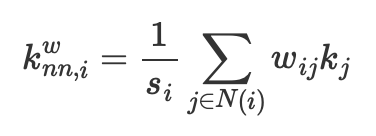

In [55]:
av_nd_w = nx.average_neighbor_degree(gg_ru_6, weight='weight')

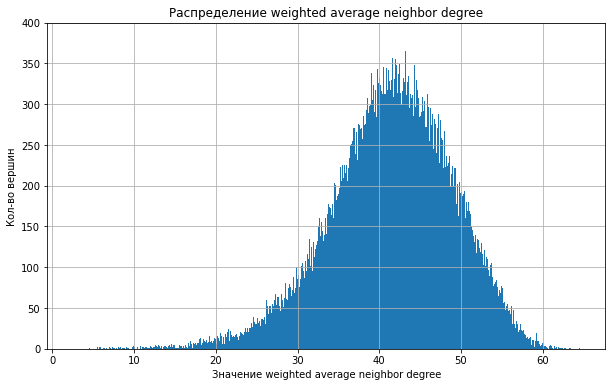

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(av_nd_w.values(), bins=1000)
plt.ylim(0, 400)
plt.grid()
plt.title("Распределение weighted average neighbor degree")
plt.xlabel("Значение weighted average neighbor degree")
plt.ylabel("Кол-во вершин")
plt.show()

Из этого определения следует, что $k_{nn,i}^w> k_{nn,i}$, если ребра с большими весами указывают на соседей с большей степенью. И $k_{nn,i}^w < k_{nn,i}$ для противоположного

In [58]:
more_list, less_list = [], []
for word in av_nd:
    if av_nd_w[word] > av_nd[word]:
        more_list.append(word)
    else:
        less_list.append(word)

In [59]:
len(more_list)

74563

In [60]:
len(less_list)

22468

## Центральность по близости между вершинами (vertices betweenness centrality)

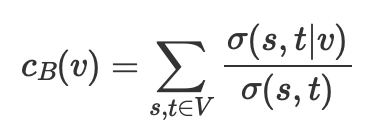

In [33]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_betweenness_centrality.pickle", "rb") as f:
    gg_bc = pickle.load(f)

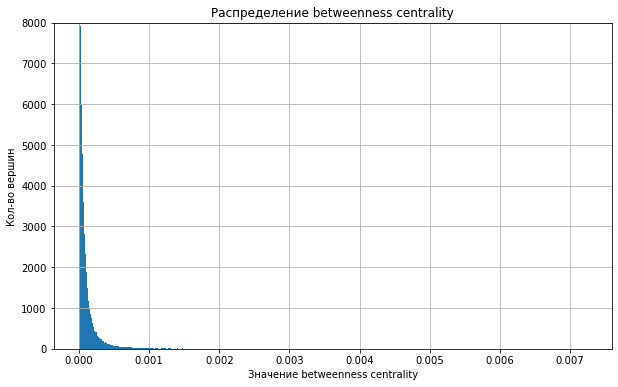

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(gg_bc.values(), bins=1000)
plt.ylim(0, 8000)
plt.grid()
plt.title("Распределение betweenness centrality")
plt.xlabel("Значение betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Центральность по близости между ребрами (edges betweenness centrality)

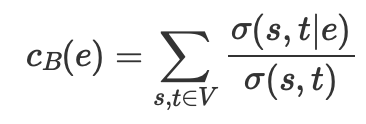

In [36]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_edge_betweenness_centrality.pickle", "rb") as f:
    gg_ebc = pickle.load(f)

In [37]:
v = np.array(list(gg_ebc.values()))

In [38]:
len(v)

1867261

In [76]:
len(v[v < 0.001])

1866622

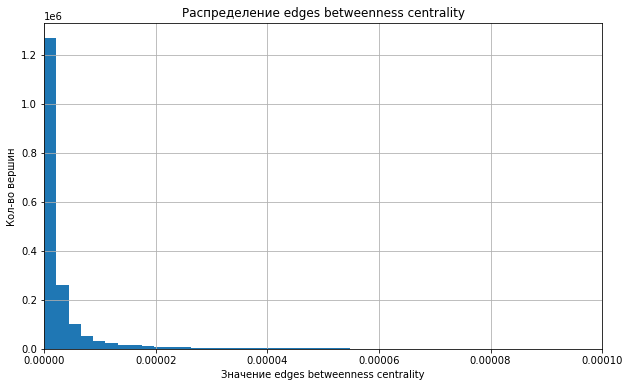

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(gg_ebc.values(), bins=3000)
# plt.ylim(0, 1000)
plt.xlim(0, 0.0001)
plt.grid()
plt.title("Распределение edges betweenness centrality")
plt.xlabel("Значение edges betweenness centrality")
plt.ylabel("Кол-во вершин")
plt.show()

In [47]:
with open("/Users/yuvlo/Spot-the-bot/Graph/characteristics/gg_load_centrality.pickle", "rb") as f:
    gg_load = pickle.load(f)

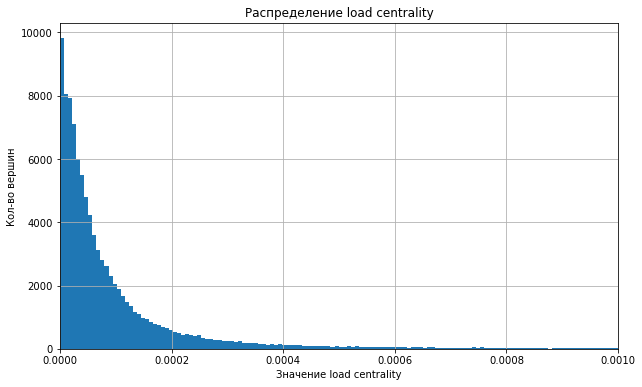

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(gg_load.values(), bins=1000)
# plt.ylim(0, 1000)
plt.xlim(0, 0.001)
plt.grid()
plt.title("Распределение load centrality")
plt.xlabel("Значение load centrality")
plt.ylabel("Кол-во вершин")
plt.show()

## Коэффициент кластеризации (взвешенный и невзвешенный)

In [60]:
cc = nx.clustering(gg_ru_6)
cc_w = nx.clustering(gg_ru_6, weight='weight')

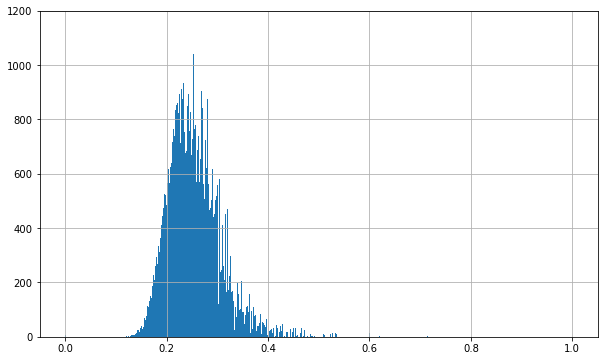

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(cc.values(), bins=1000)
plt.ylim(0, 1200)
plt.grid()
plt.show()

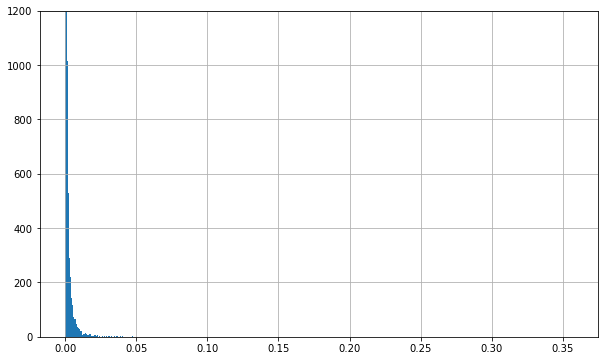

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(cc_w.values(), bins=1000)
plt.ylim(0, 1200)
plt.grid()
plt.show()

## Средний коэффициент кластеризации (взвешенный и невзвешенный)

In [62]:
cc = nx.clustering(gg_ru_6)

In [64]:
w_cc = nx.clustering(gg_ru_6, weight='weight')

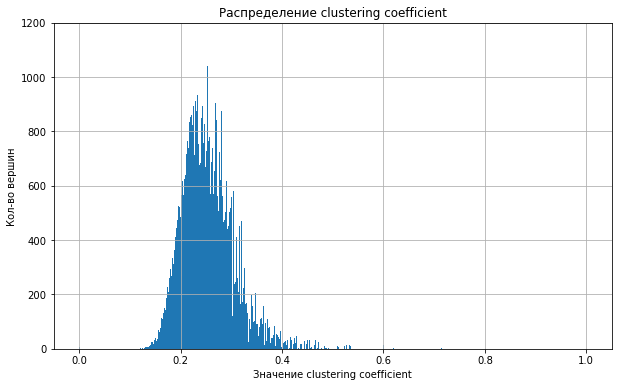

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(cc.values(), bins=1000)
plt.ylim(0, 1200)
plt.grid()
plt.title("Распределение clustering coefficient")
plt.xlabel("Значение clustering coefficient")
plt.ylabel("Кол-во вершин")
plt.show()

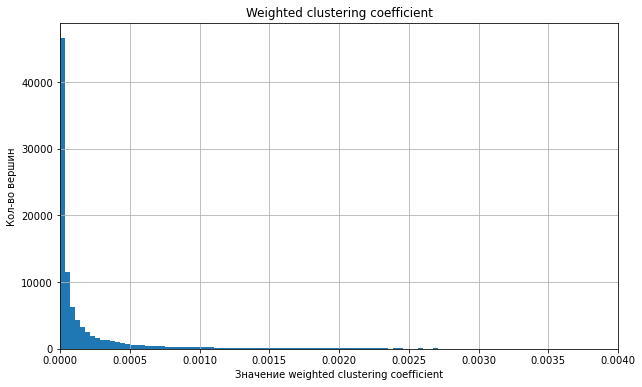

In [74]:
plt.figure(figsize=(10, 6))
plt.hist(w_cc.values(), bins=10000)
# plt.ylim(0, )
plt.xlim(0, 0.004)
plt.grid()
plt.title("Weighted clustering coefficient")
plt.xlabel("Значение weighted clustering coefficient")
plt.ylabel("Кол-во вершин")
plt.show()

In [75]:
nx.average_clustering(gg_ru_6)

0.253621144654654

In [76]:
nx.average_clustering(gg_ru_6, weight='weight')

0.0004080038377177213

In [4]:
nds = list(gg_ru_6.nodes)[:10000]

In [5]:
nx.degree_assortativity_coefficient(gg_ru_6, weight='weight', nodes=nds)

0.9142849624422718

In [7]:
rc = nx.rich_club_coefficient(gg_ru_6, normalized=False)

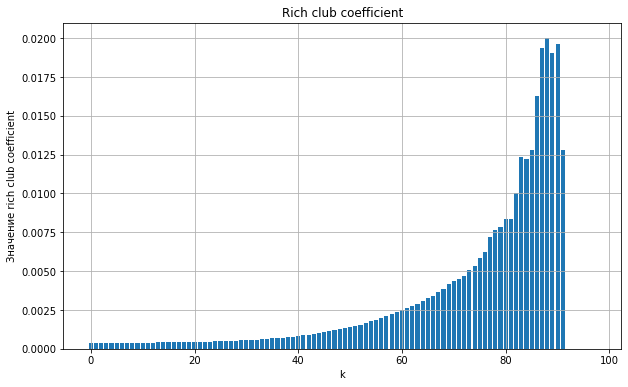

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(x=rc.keys(), height=rc.values())
plt.grid()
plt.title("Rich club coefficient")
plt.xlabel("k")
plt.ylabel("Значение rich club coefficient")
plt.show()